In [2]:
import numpy as np
from time import time
import torch
import matplotlib.pyplot as plt
import argparse
from utils import bin_spectrum
import os
import pickle
opj = os.path.join

from torch.distributions import Normal, HalfNormal

import sbi
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

from sbi_bmode import sbi_utils#, data # unpickle_from_gpu_to_cpu

from getdist import plots as getdist_plots
from getdist import MCSamples as getdist_MCSamples

In [3]:
indir = '/mnt/home/abayer/cca_project/output/'

r_trues = [0.1, 0.05, 0.01, 0.001, 0.0001][:]
seed = -1
n_trains = [100, 200, 500, 1000, 10000][:-1]
n_samples = 1000
n_rounds = 1

# for bins and plotting 
rmin = 0
rmax = 0.3
nbins = 100
r_bin_edges = np.linspace(rmin, rmax, nbins+1)

# fiducial values: r_tensor=0.1, A_lens=1, A_d_BB=5, alpha_d_BB=-0.2, beta_dust=1.59
n_params = 5
param_names = ['r_tensor', 'A_lens', 'A_d_BB', 'alpha_d_BB', 'beta_dust']
param_labels = [r'$r$', r'$A_L$', r'$A_d^{BB}$', r'$\alpha_d^{BB}$', r'$\beta_d$']   
param_labels_g = [l[1:-1] for l in param_labels] # getdist will put in $
param_truths = [None, 1, 5, -0.2, 1.59]
    


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


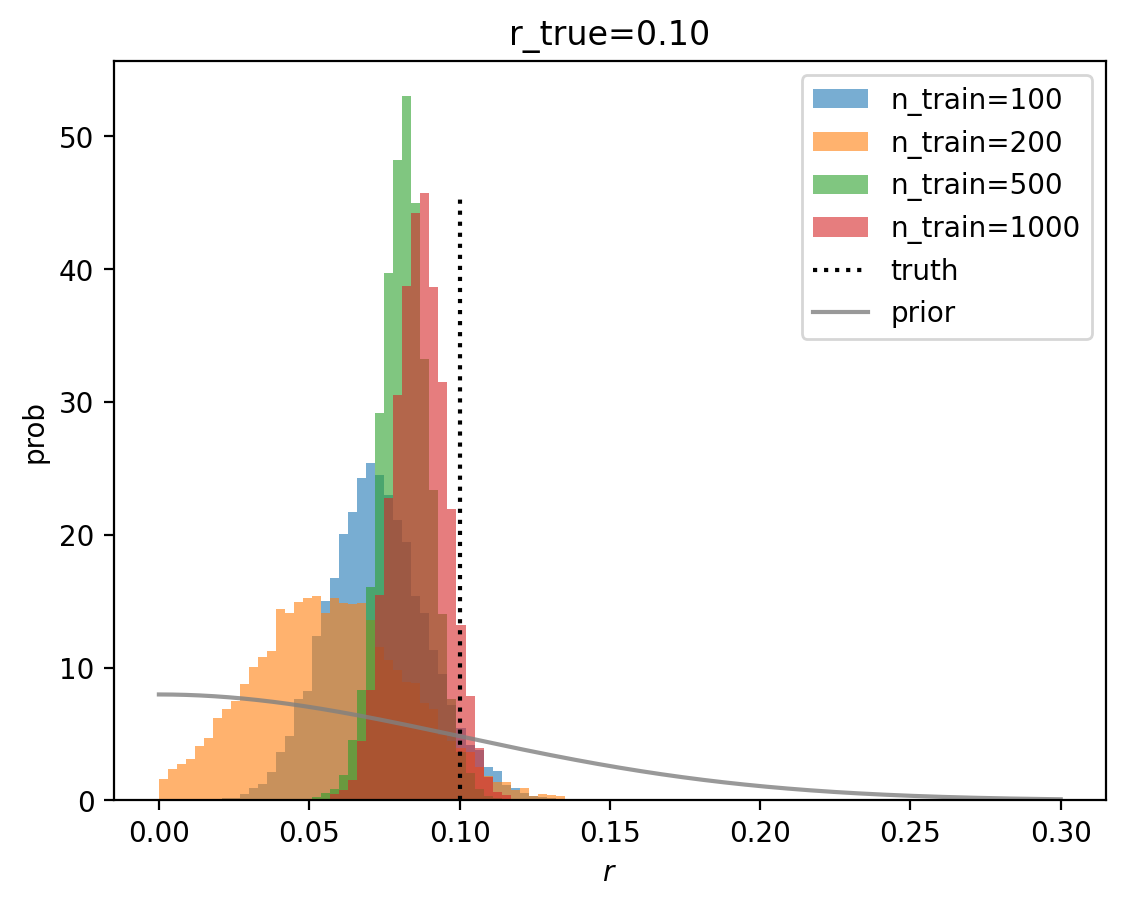

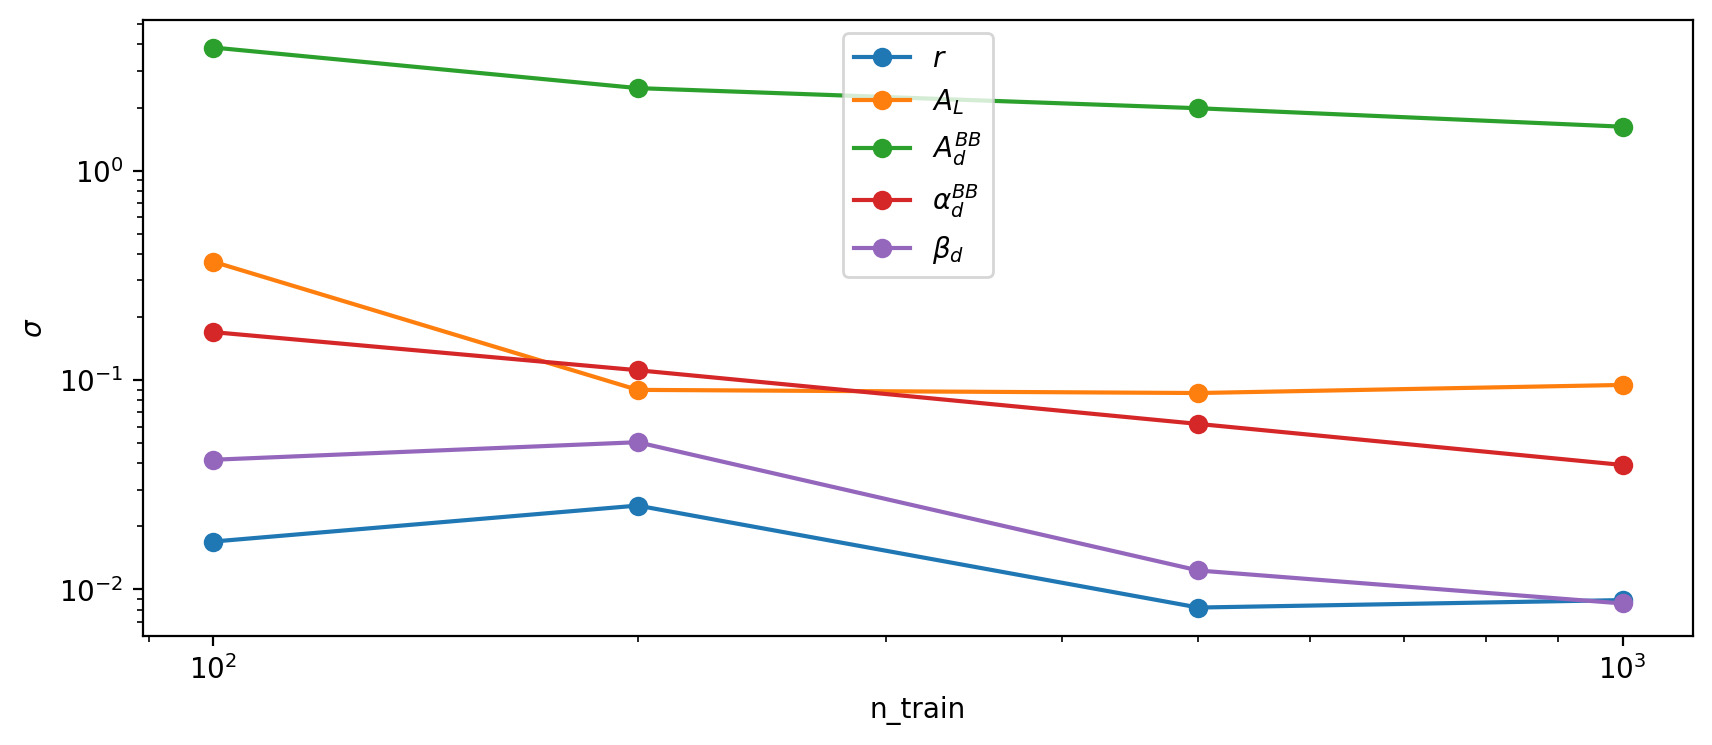

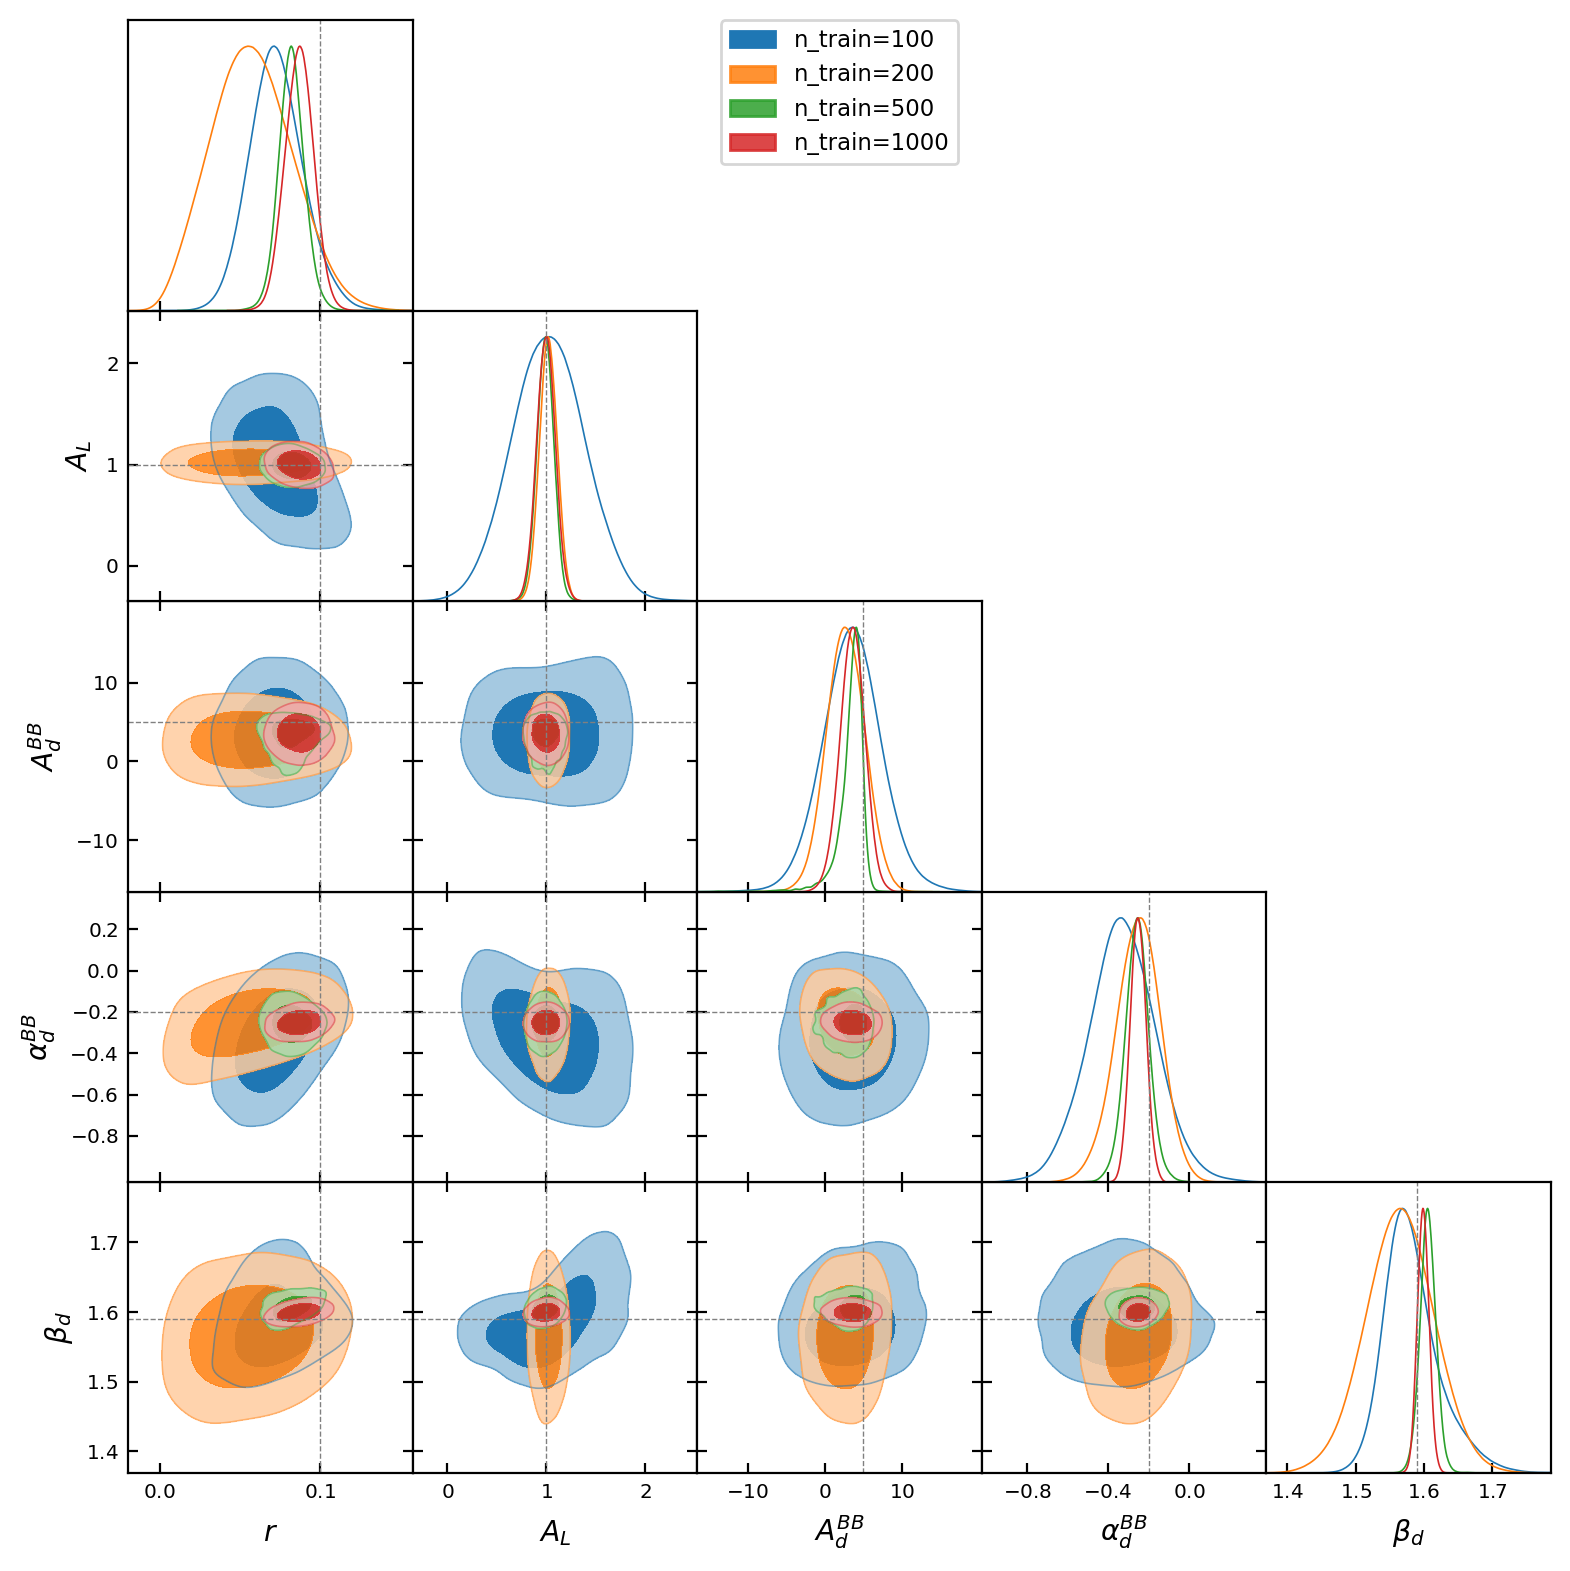

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


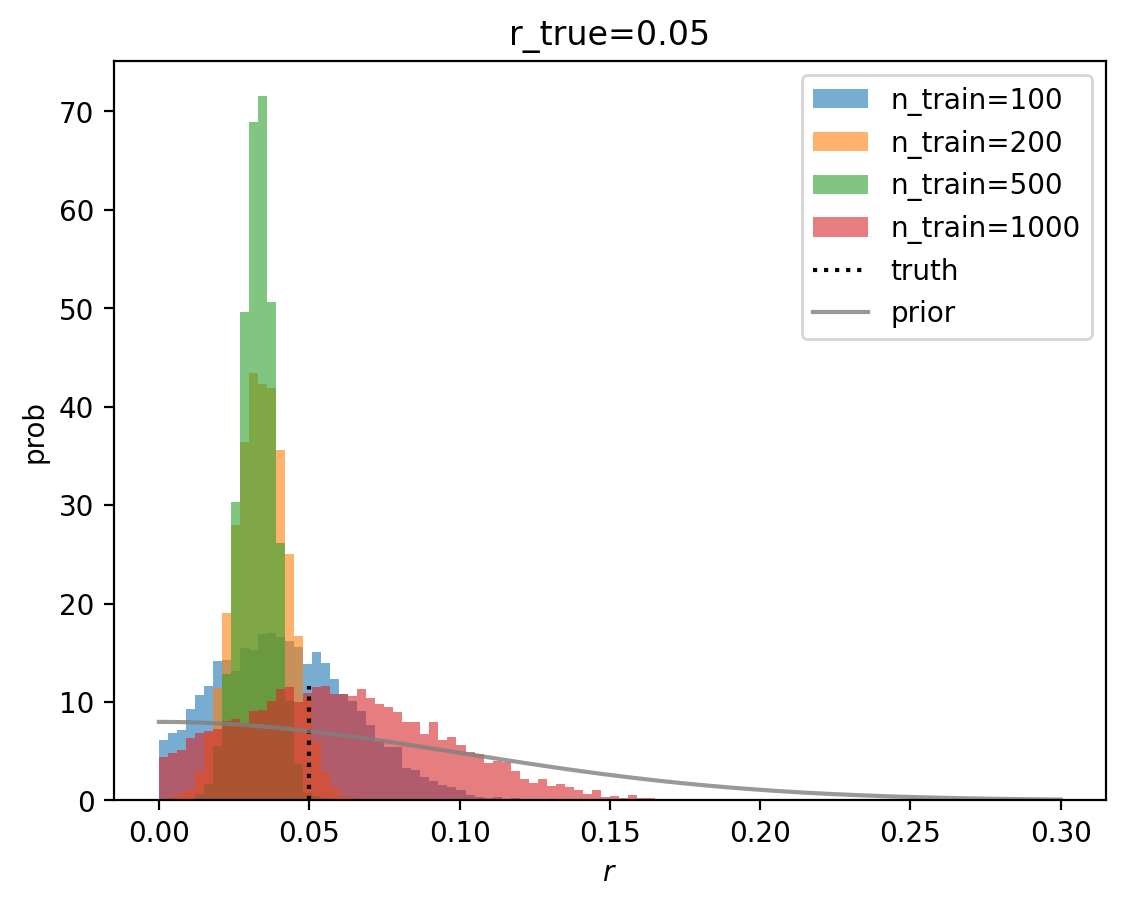

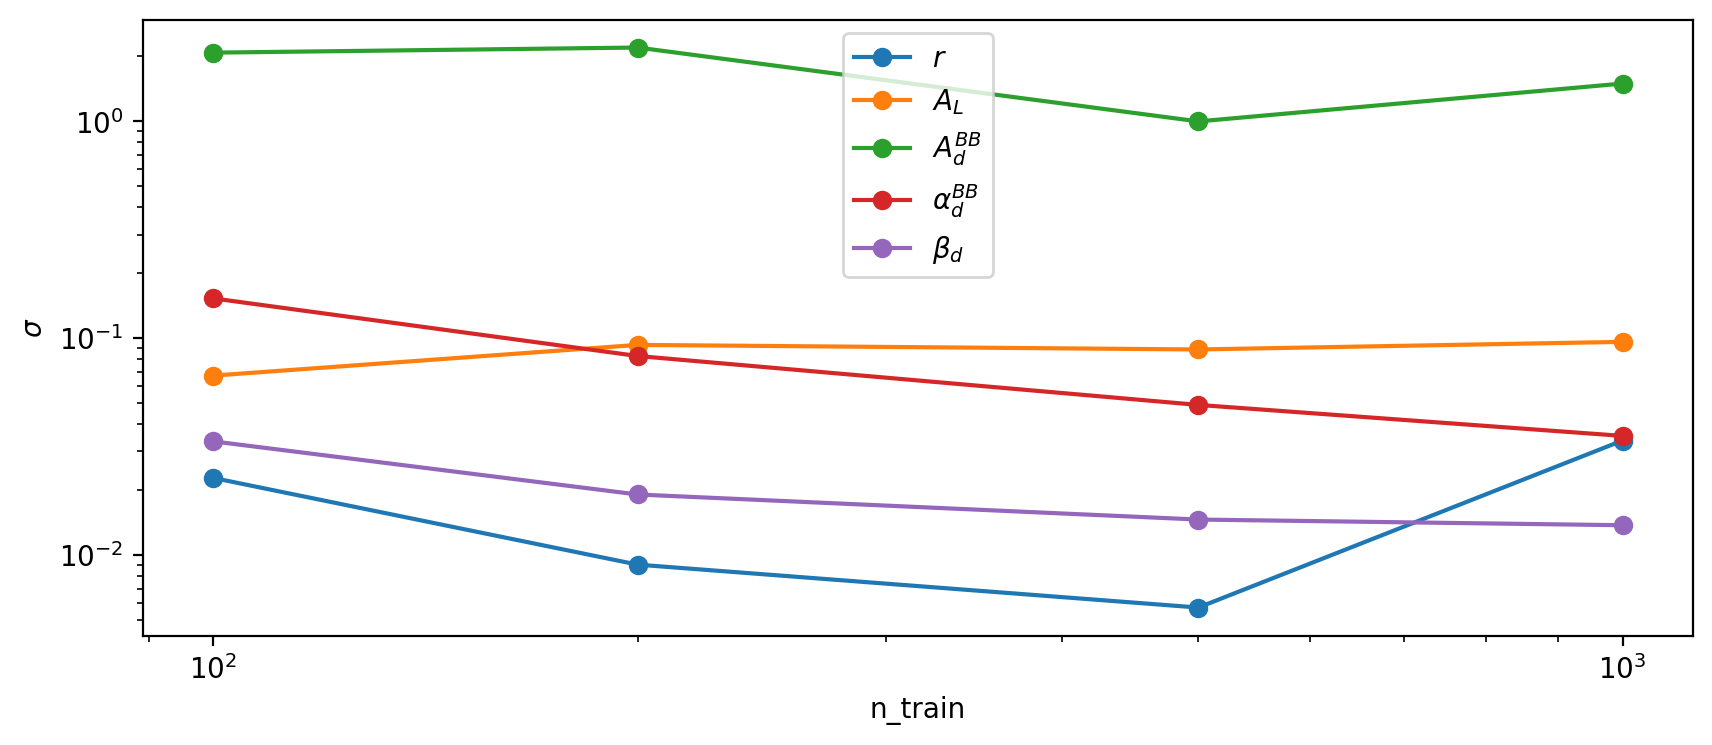

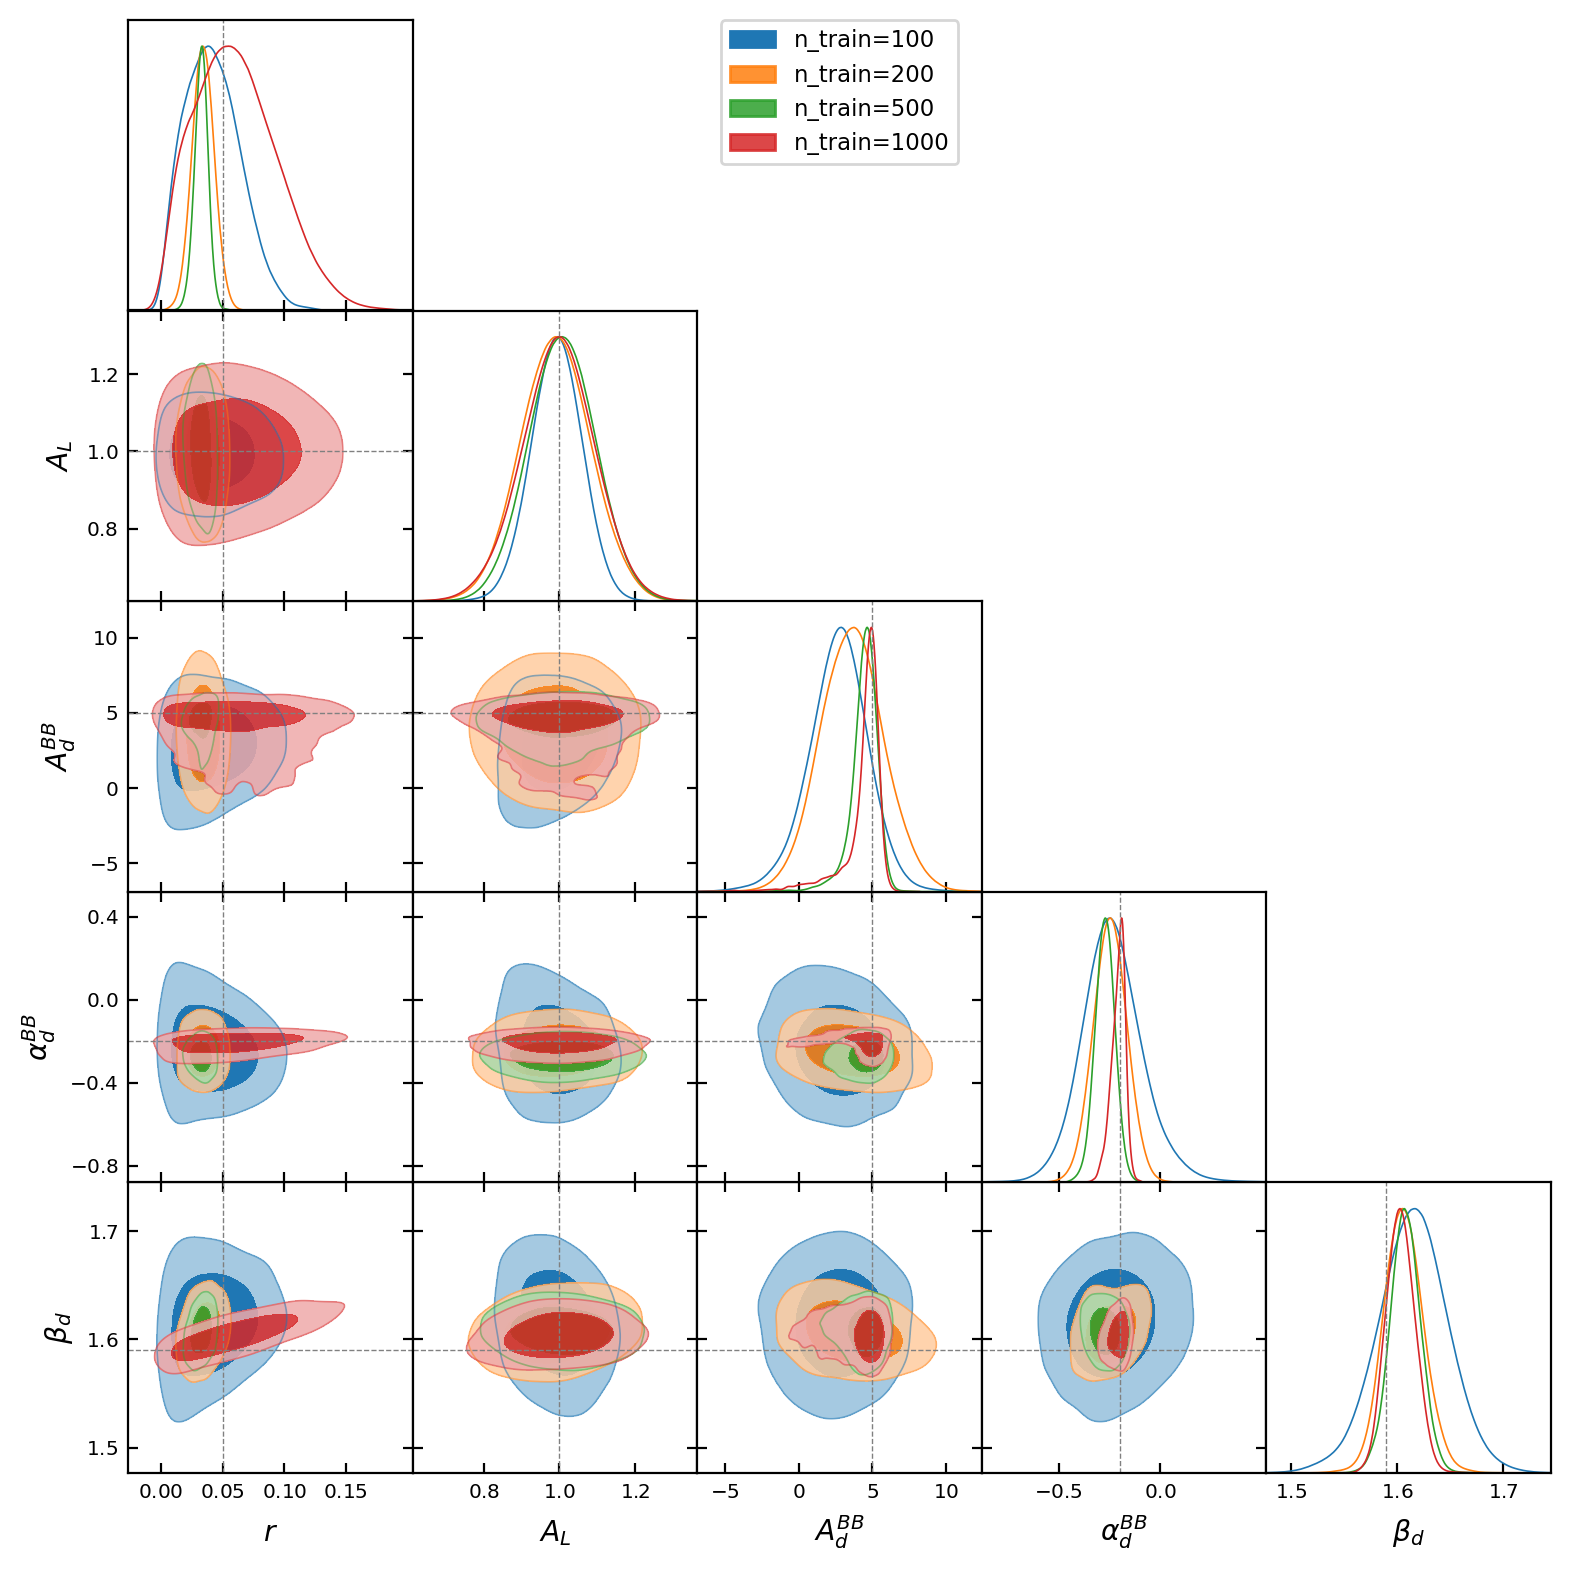

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


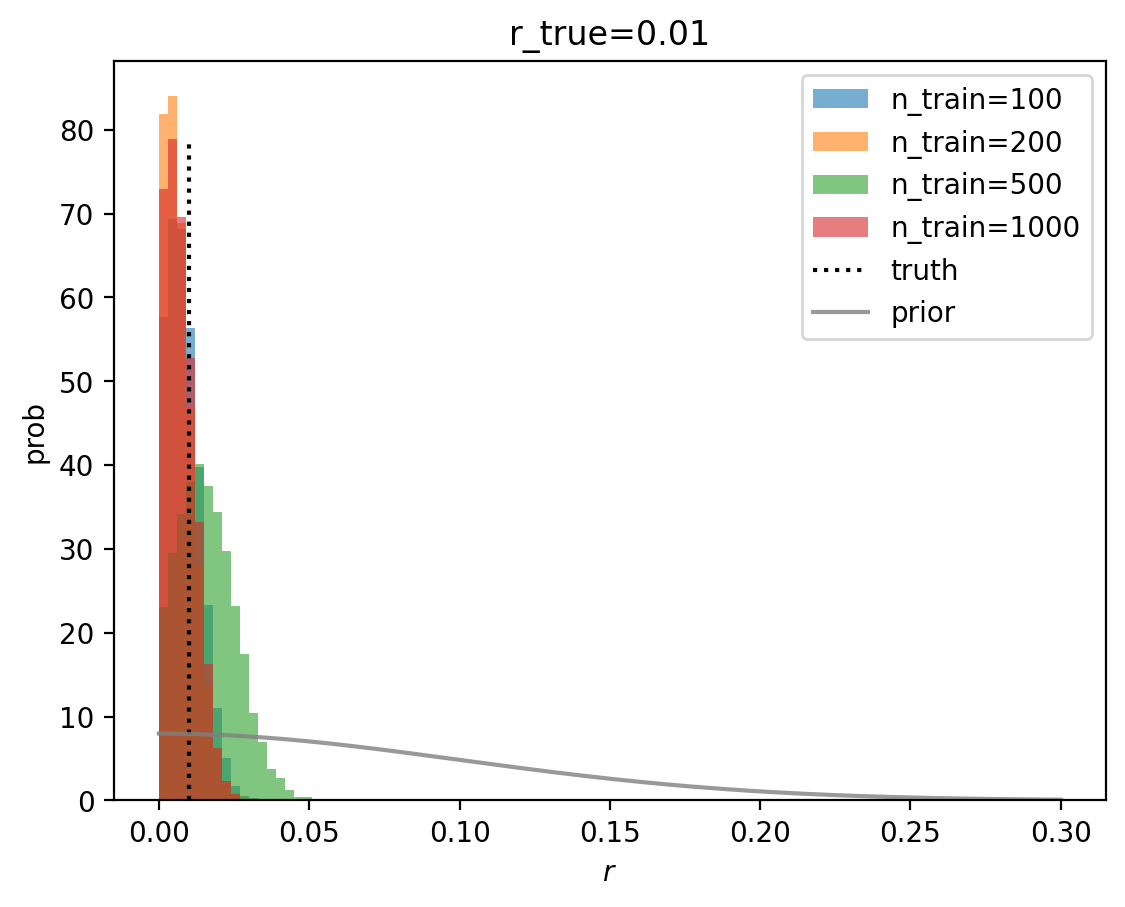

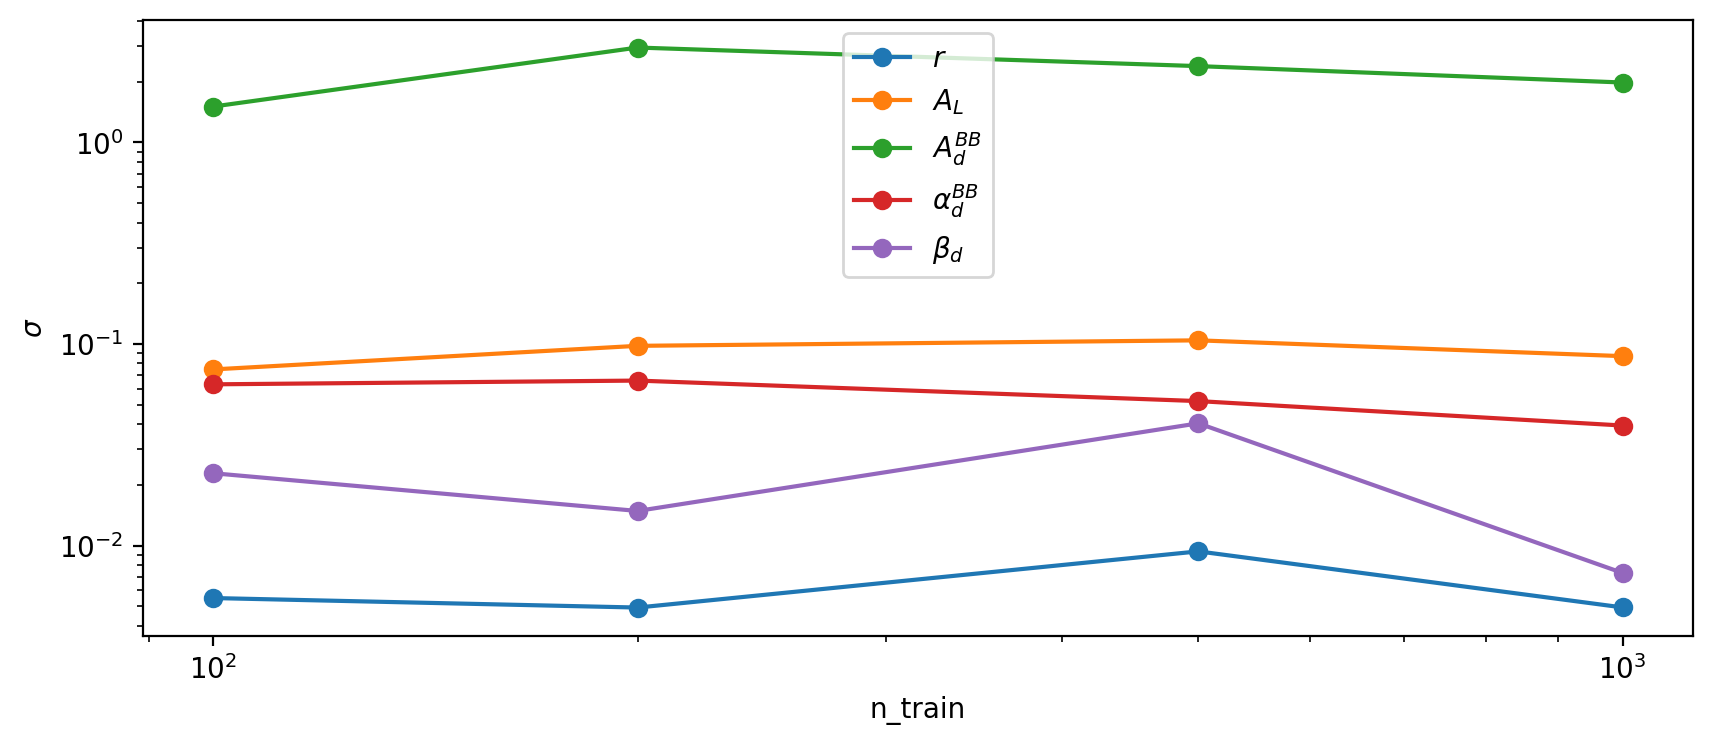

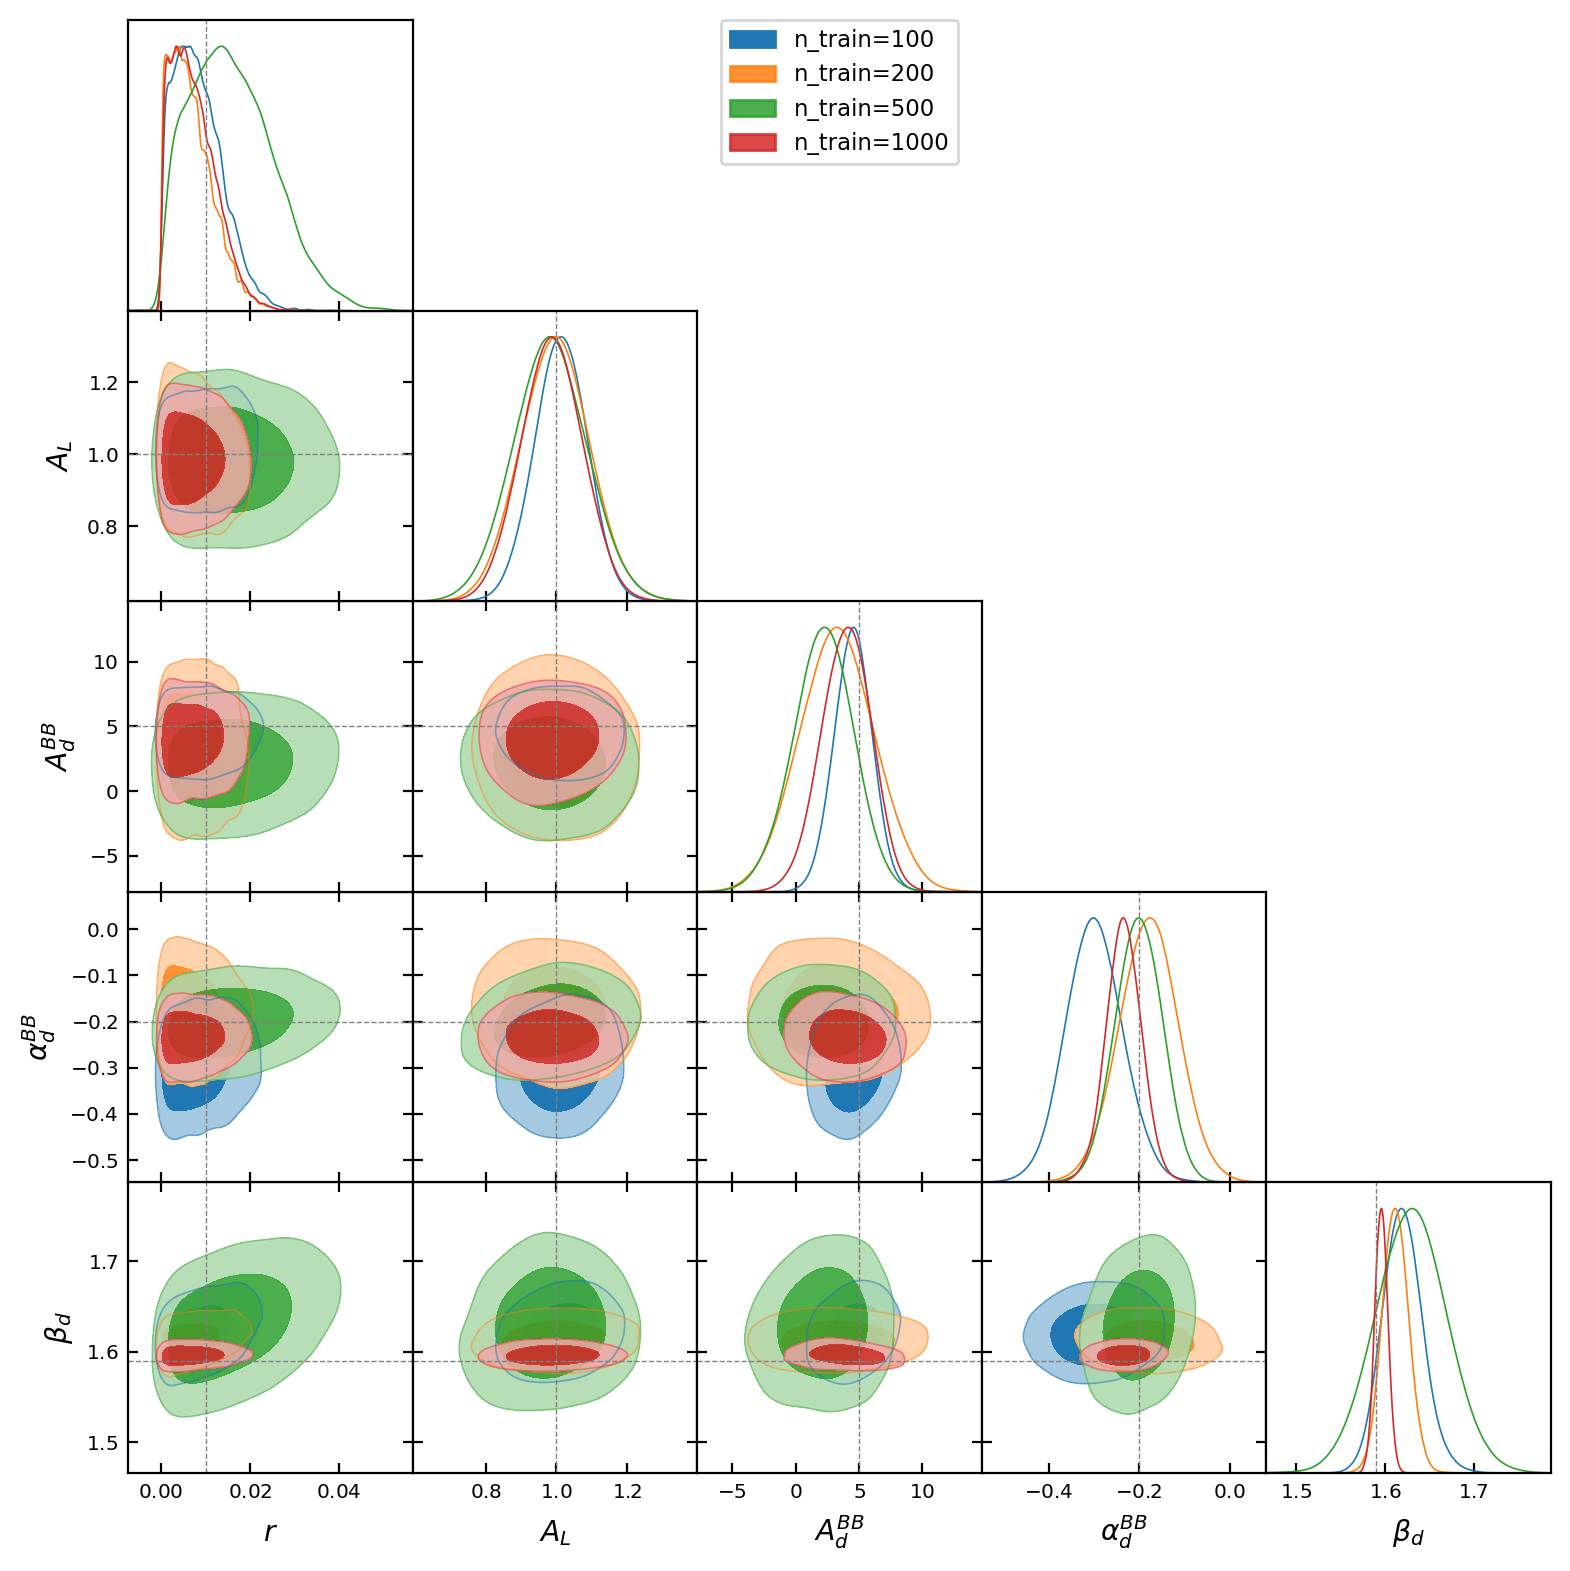

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


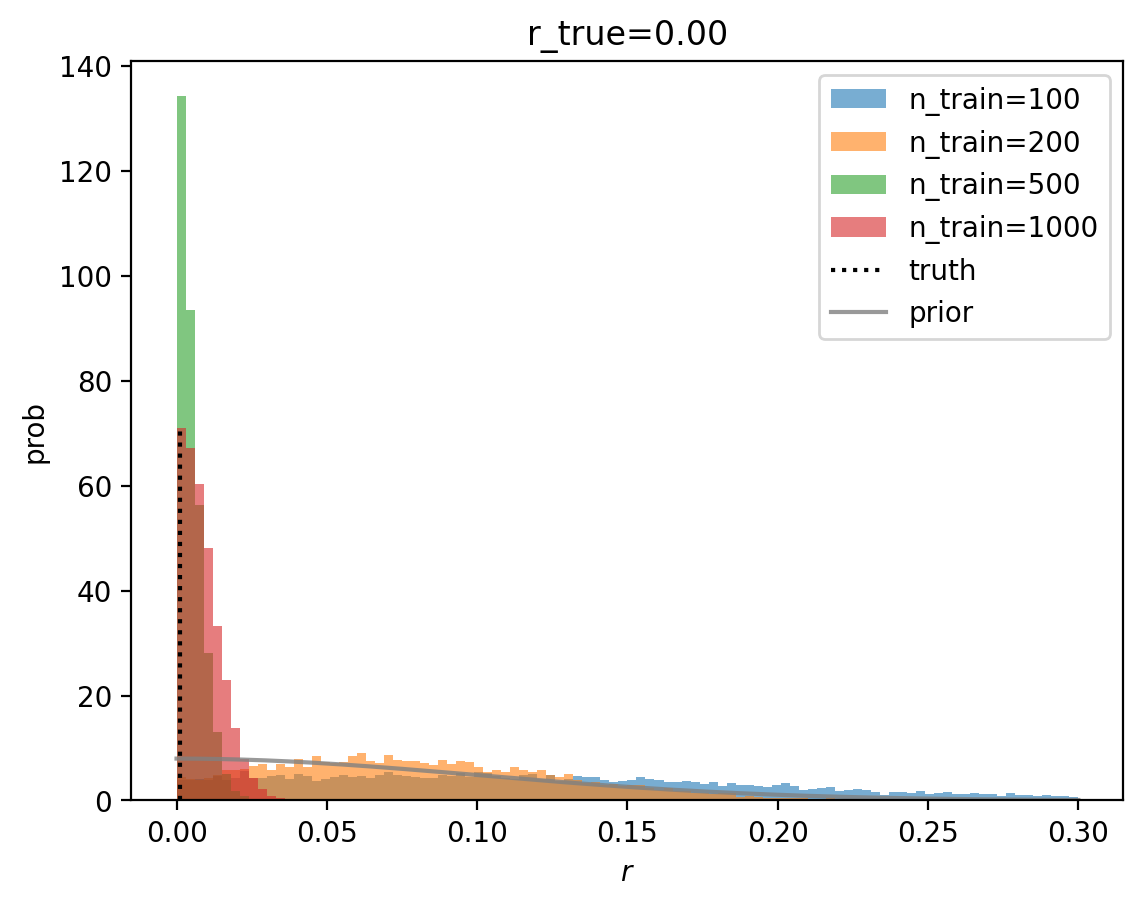

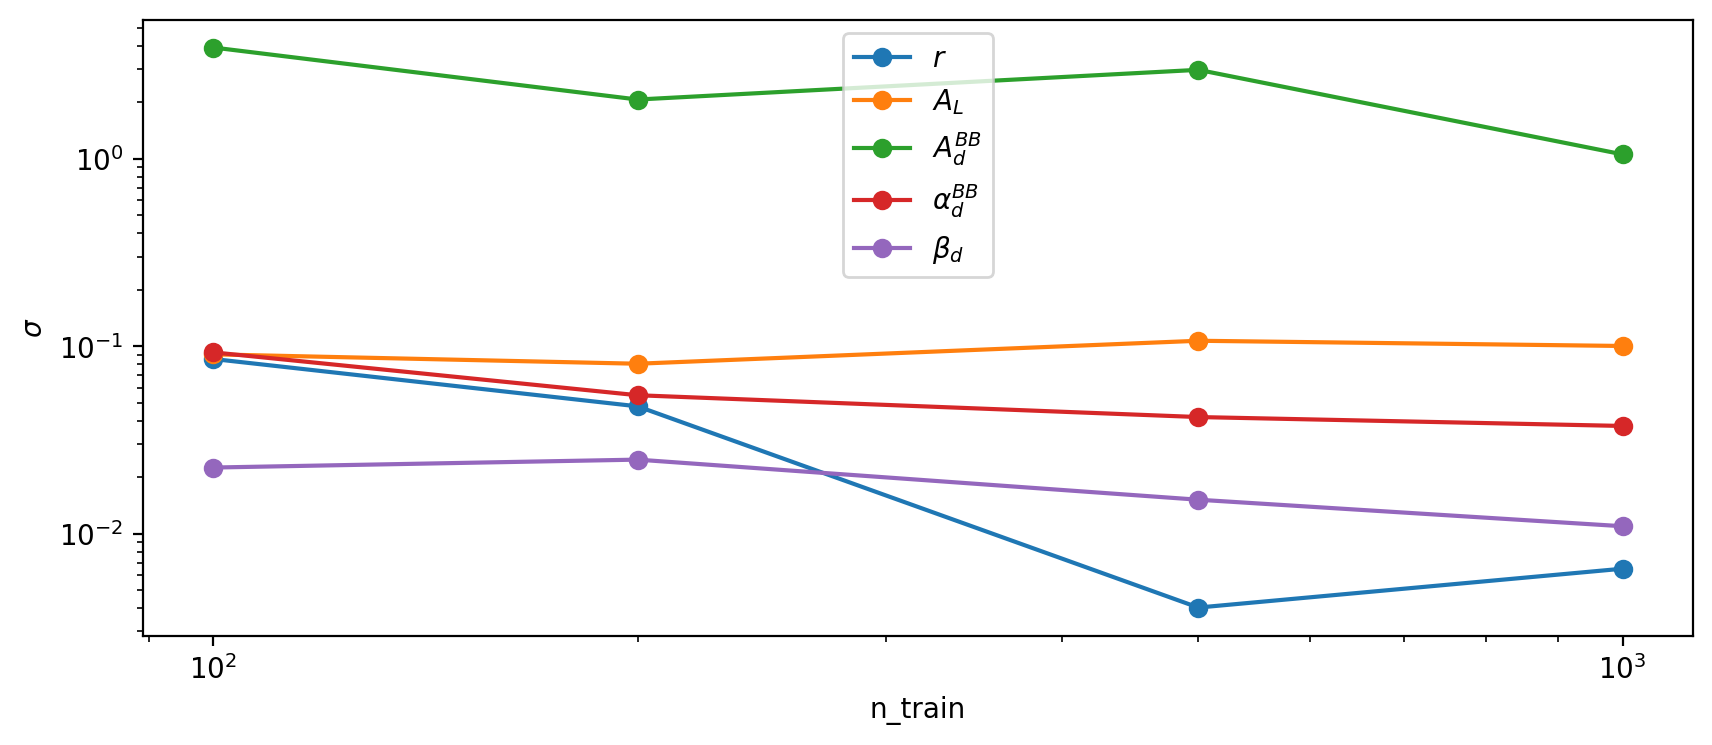

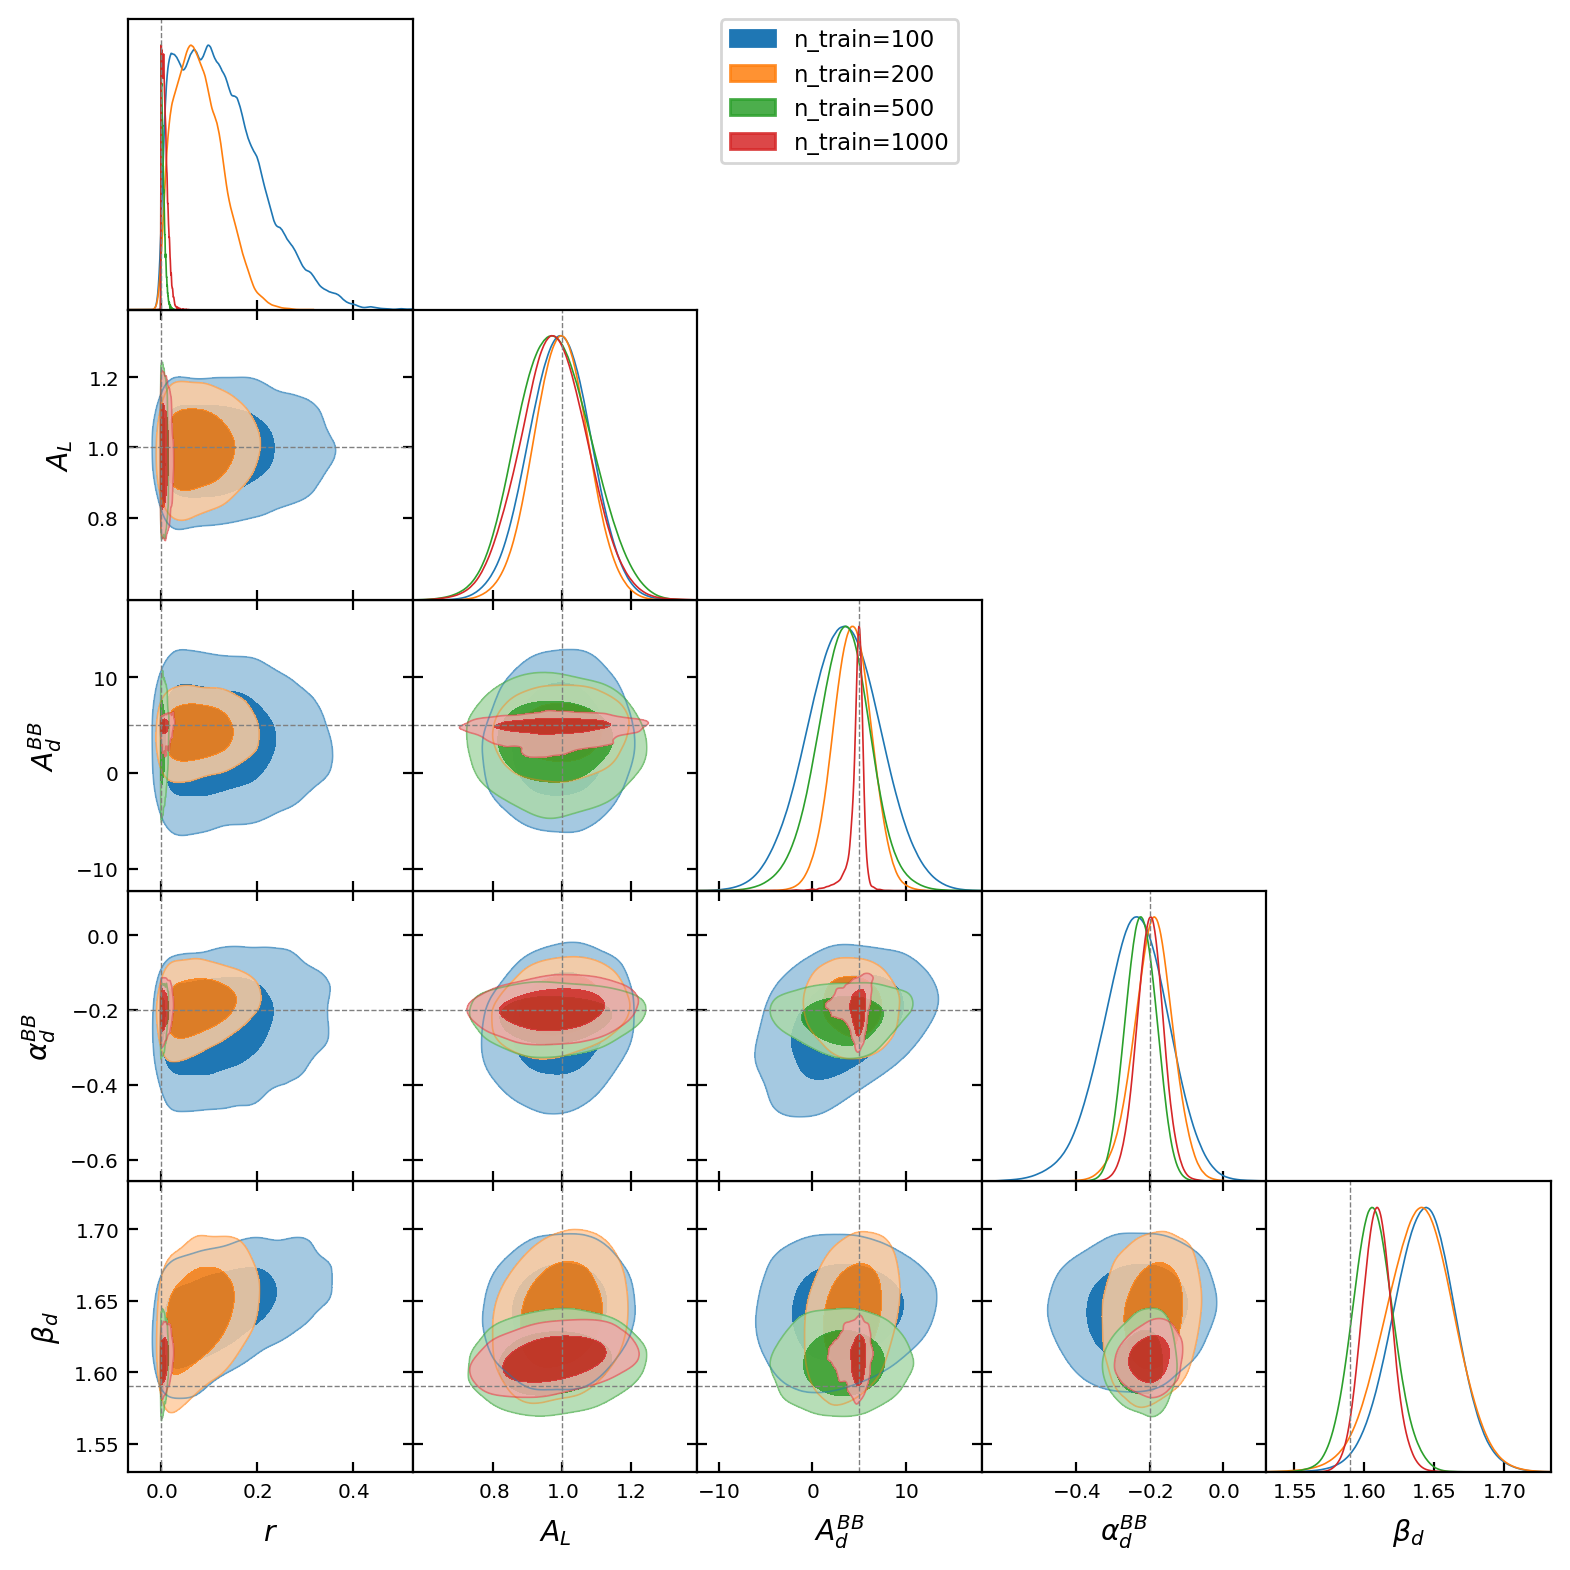

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


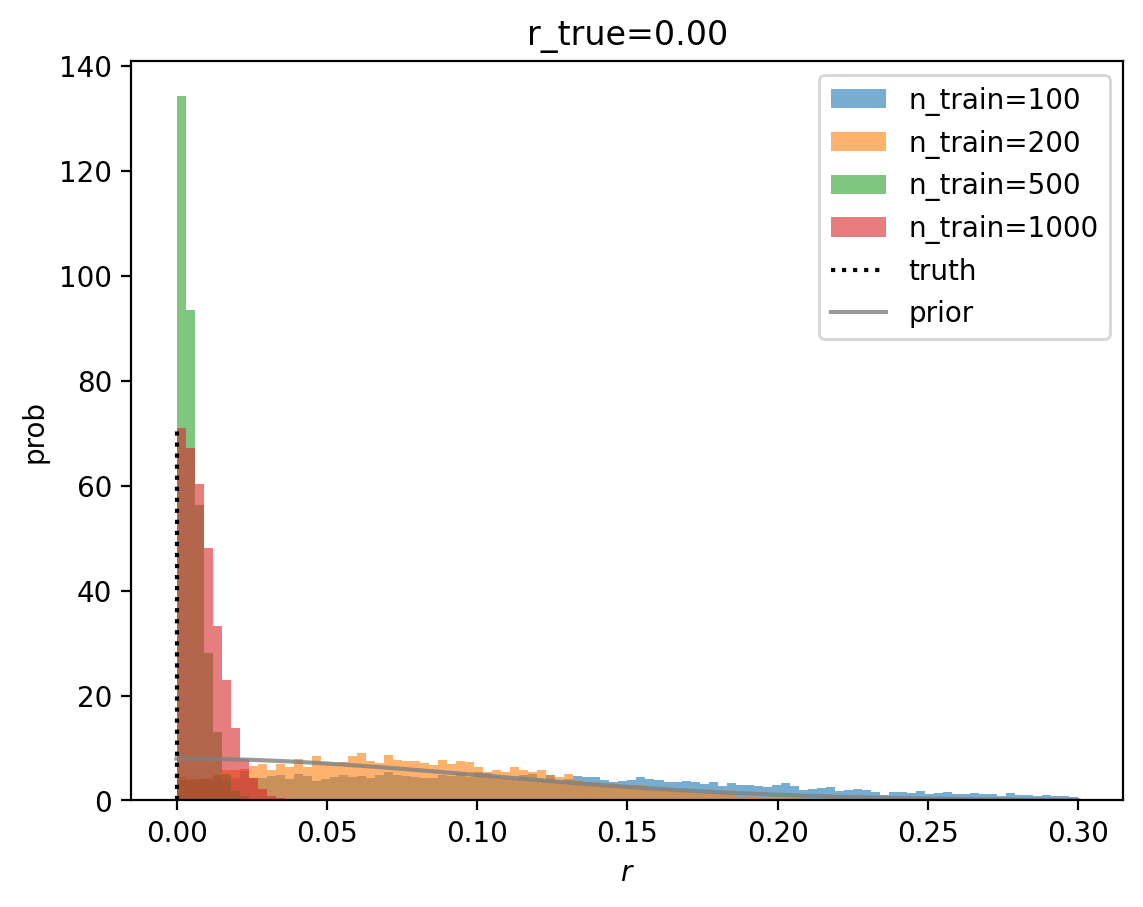

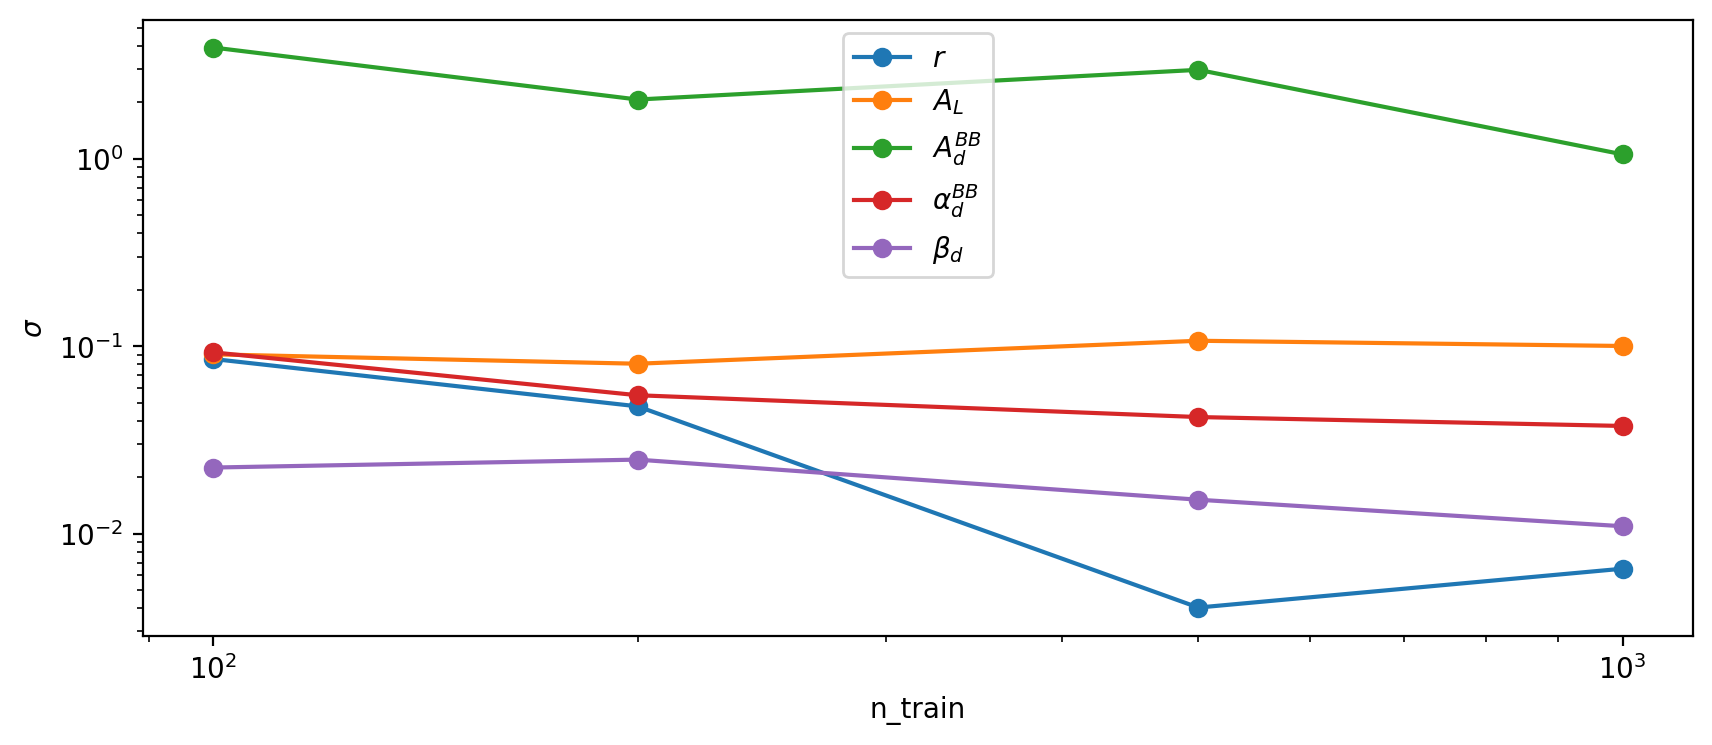

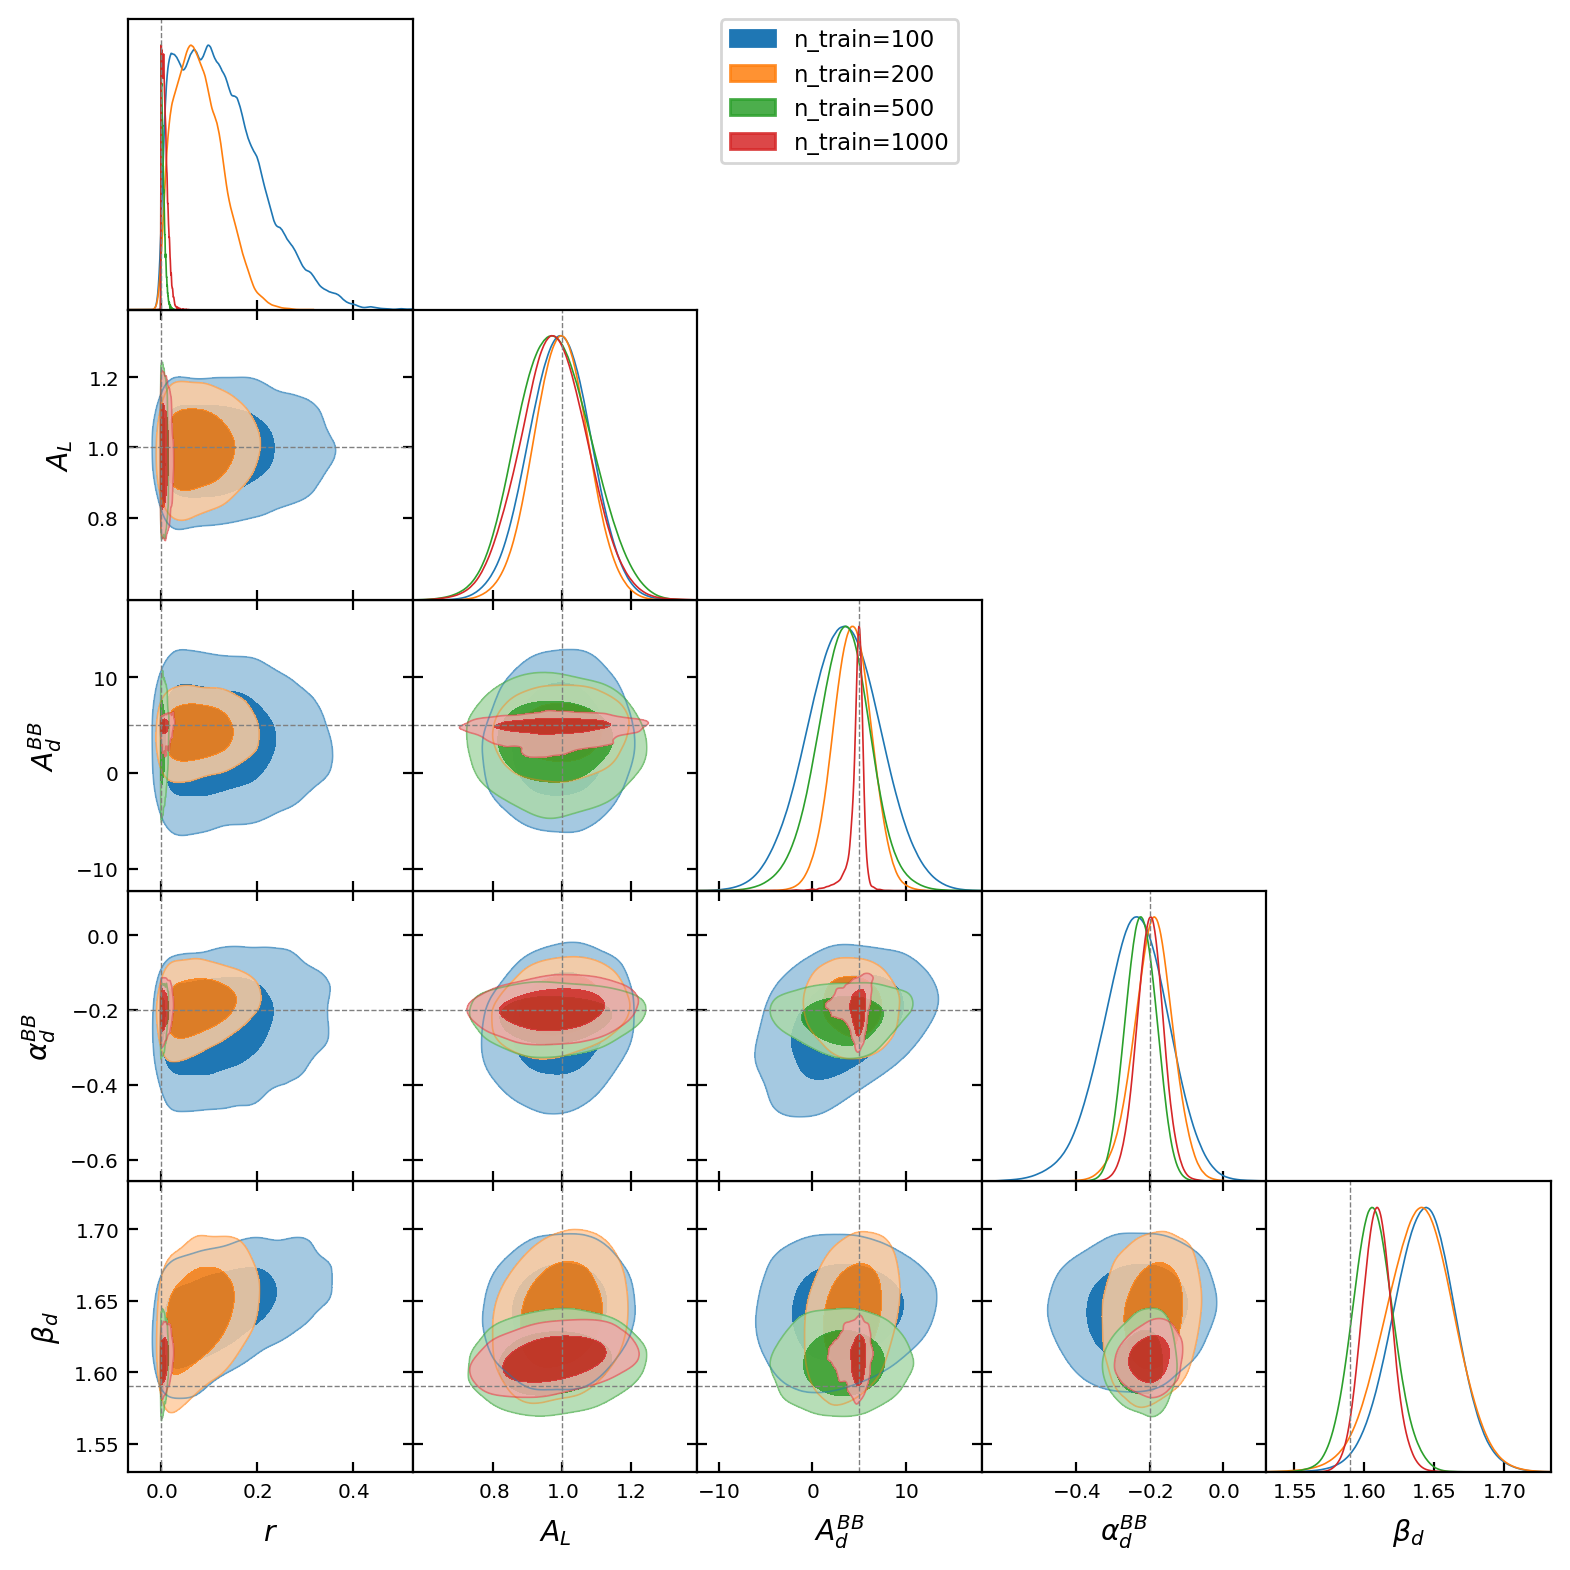

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
for r_true in r_trues:
    param_truths[0] = r_true   # FIXME maybe use dict instead of indexing
    plt.figure()
    samples_g = []
    stds = np.empty((len(n_trains), n_params))
    for nti,n_train in enumerate(n_trains):
        subdirname = 'r%.2e_s%d_nt%d_ns%d_nr%d' % (r_true, seed, n_train, n_samples, n_rounds)

        samples = np.load(opj(indir,subdirname,'samples.npy'))
        rsamples = samples[:,0]
        stds[nti] = np.std(samples, axis=0)

        hist=plt.hist(rsamples, bins=r_bin_edges, label='n_train=%d'%n_train, color='C%d'%nti, alpha=0.6, density=1)
        samples_g.append( getdist_MCSamples(samples=samples, names = param_labels, labels = param_labels_g, label='n_train=%d'%n_train))

    plt.vlines(r_true, 0, hist[0].max(), color='k', linestyle=':', label='truth')
    plt.plot(np.linspace(rmin,rmax,1000), np.exp(HalfNormal(0.1).log_prob(torch.linspace(rmin,rmax,1000))), color='gray', alpha=0.8, label='prior')
    plt.title('r_true=%.2e'%r_true)
    plt.xlabel(r'$r$')
    plt.ylabel('prob')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,4))
    for i in range(n_params):
        plt.plot(n_trains, stds[:,i], label=param_labels[i], marker='o')
    plt.xlabel('n_train')
    plt.ylabel(r'$\sigma$')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    #plt.figure()
    g = getdist_plots.get_subplot_plotter(width_inch=8)
    g.triangle_plot(samples_g, filled=True,
                            markers=param_truths,
                            contour_colors=['C%d'%i for i in range(n_train)],
    )
    plt.show()